In [2]:
import pandas as pd 

In [3]:
train = pd.read_csv('datasets/HousePricesTrain.csv')
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [5]:
test = pd.read_csv('datasets/test.csv')
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [6]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

In [7]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


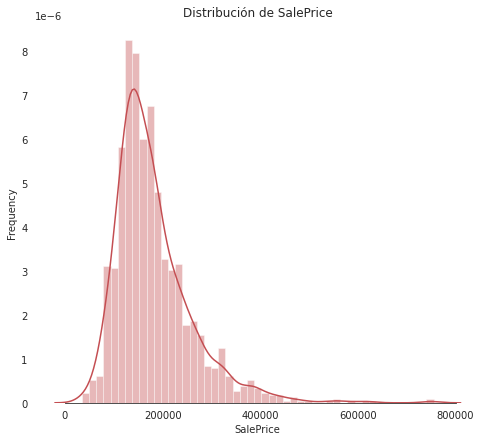

In [9]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
sns.distplot(train['SalePrice'], color="r");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="Distribución de SalePrice")
sns.despine(trim=True, left=True)
plt.show()

In [10]:
train_ID = train['Id']
test_ID = test['Id']
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)
train.shape, test.shape

((1460, 80), (1459, 79))

In [11]:
# log transformación
train["SalePrice"] = np.log1p(train["SalePrice"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 12.02 and sigma = 0.40



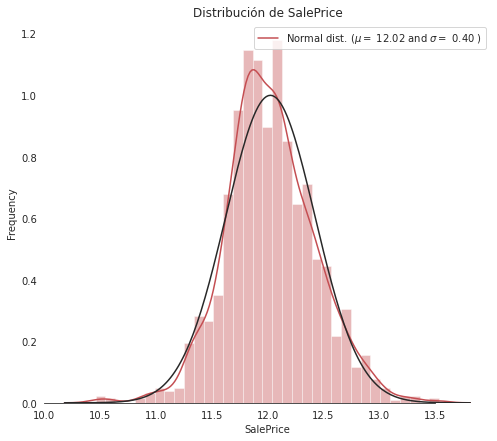

In [12]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm, color="r");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="Distribución de SalePrice")
sns.despine(trim=True, left=True)

plt.show()

In [13]:
# Split features and labels
train_labels = train['SalePrice'].reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

# Combine train and test features in order to apply the feature transformation pipeline to the entire dataset
all_features = pd.concat([train_features, test_features]).reset_index(drop=True)
all_features.shape

(2919, 79)

In [14]:
#missing data
total = all_features.isnull().sum().sort_values(ascending=False)
percent = (all_features.isnull().sum()/all_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


In [15]:
all_features['MSSubClass']

0        60
1        20
2        60
3        70
4        60
       ... 
2914    160
2915    160
2916     20
2917     85
2918     60
Name: MSSubClass, Length: 2919, dtype: int64

In [16]:
all_features['OverallCond']

0       5
1       8
2       5
3       5
4       5
       ..
2914    7
2915    5
2916    7
2917    5
2918    5
Name: OverallCond, Length: 2919, dtype: int64

In [17]:
all_features['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [18]:
# Se pasan a String porque son variables categóricas
all_features['MSSubClass'] = all_features['MSSubClass'].apply(str)
all_features['YrSold'] = all_features['YrSold'].astype(str)
all_features['MoSold'] = all_features['MoSold'].astype(str)

In [19]:
## Algunss variables deben tener una categoría 'None' de acuerdo al contexto, por ejemplo en la característica PoolQC,
## Hay valores en blanco que significa que no hay piscina en la casa.
missing_categoric = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_categoric:
    all_features[i] = all_features[i].fillna('None')

In [20]:
# En estas variables, los valores nulos se deben reemplazar por cero, de acuerdo al contexto
## Por ejemplo con GarageArea, significa que no hay garage, entonces no aplica y no se podría poner el promedio, por ejemplo.
missing_numeric = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for i in missing_numeric:
    all_features[i] = all_features[i].fillna(0)
    
# Según el contexto de la variable, se opta por llenar sus valores faltantes con la mediana de los de su
## mismo vecindario. 
all_features['LotFrontage'] = all_features.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.median()))

In [21]:
## De acuerdo al contexto no se pueden llenar los valores faltantes con ceros o 'None'
# Por ser una variable categórica, tampoco por la media ni la mediana, se oprta por llenar la variable con la moda.
all_features['MSZoning'] = all_features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [22]:
# Se llena según explicación de la descripción del dataset
all_features['Functional'] = all_features['Functional'].fillna('Typ') 

In [23]:
all_features['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [24]:
all_features['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [25]:
all_features['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [26]:
## Se llenan con la moda
all_features['Utilities'] = all_features['Utilities'].fillna('AllPub') 
all_features['KitchenQual'] = all_features['KitchenQual'].fillna("TA") 
all_features['Electrical'] = all_features['Electrical'].fillna("SBrkr")

In [27]:
## Se llenan con la moda
all_features['Exterior1st'] = all_features['Exterior1st'].fillna(all_features['Exterior1st'].mode()[0]) 
all_features['Exterior2nd'] = all_features['Exterior2nd'].fillna(all_features['Exterior2nd'].mode()[0])
all_features['SaleType'] = all_features['SaleType'].fillna(all_features['SaleType'].mode()[0])

In [28]:
## Se comprueba que no hayan datos faltantes
total = all_features.isnull().sum().sort_values(ascending=False)
percent = (all_features.isnull().sum()/all_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
SaleCondition,0,0.0
Foundation,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
BsmtQual,0,0.0


In [29]:
all_features['Utilities'].value_counts()

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

In [30]:
all_features['Street'].value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

In [31]:
all_features['PoolQC'].value_counts()

None    2909
Gd         4
Ex         4
Fa         2
Name: PoolQC, dtype: int64

In [32]:
all_features = all_features.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

In [33]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in all_features.columns:
    if all_features[i].dtype in numeric_dtypes:
        numeric.append(i)

In [34]:
skew_features = all_features[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 25 numerical features with Skew > 0.5 :


MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
dtype: float64

In [41]:
all_features['PoolArea'].value_counts()

0      2906
561       1
555       1
519       1
800       1
738       1
648       1
576       1
512       1
480       1
444       1
368       1
228       1
144       1
Name: PoolArea, dtype: int64

In [42]:
all_features['TotalSF'] = (all_features['TotalBsmtSF'] 
                       + all_features['1stFlrSF'] 
                       + all_features['2ndFlrSF'])

all_features['YrBltAndRemod'] = all_features['YearBuilt'] + all_features['YearRemodAdd']

all_features['Total_sqr_footage'] = (all_features['BsmtFinSF1'] 
                                 + all_features['BsmtFinSF2'] 
                                 + all_features['1stFlrSF'] 
                                 + all_features['2ndFlrSF']
                                )
                                 

all_features['Total_Bathrooms'] = (all_features['FullBath'] 
                               + (0.5 * all_features['HalfBath']) 
                               + all_features['BsmtFullBath'] 
                               + (0.5 * all_features['BsmtHalfBath'])
                              )
                               

all_features['Total_porch_sf'] = (all_features['OpenPorchSF'] 
                              + all_features['3SsnPorch'] 
                              + all_features['EnclosedPorch'] 
                              + all_features['ScreenPorch'] 
                              + all_features['WoodDeckSF'])

In [43]:
## Se crean nuevas variables, por ejemplo, tiene sentido una variable de si hay piscina o no, 
# Que tendría el valor de 1, si poolArea tiene un valor mayor a 0.
all_features['haspool'] = all_features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_features['has2ndfloor'] = all_features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_features['hasgarage'] = all_features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_features['hasbsmt'] = all_features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_features['hasfireplace'] = all_features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [44]:
all_features = pd.get_dummies(all_features).reset_index(drop=True)
all_features.shape

(2919, 334)

In [45]:
all_features.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [46]:
X = all_features.iloc[:len(train_labels), :]
X_test = all_features.iloc[len(train_labels):, :]
X.shape, train_labels.shape, X_test.shape

((1460, 334), (1460,), (1459, 334))

In [47]:
Y = train_labels

In [48]:
type(Y)


pandas.core.series.Series

In [49]:
Y = Y.to_numpy()


In [50]:
X = X.to_numpy()

In [51]:
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [52]:
def rmse(y_actual, y_predicted):
    rms = np.sqrt(mean_squared_error(y_actual, y_predicted))
    return rms

PCA

In [53]:
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import time

In [54]:
#ejercicio de código
def entrenamiento_pca_ext_caracteristicas(n_comp, X, Y):
    #Implemetamos la metodología de validación 
    
    ##RMSE
    Errores = np.ones(5)
    ErroresSinTransf = np.ones(5)
    
    ##MAPE
    Errores1 = np.ones(5)
    ErroresSinTransf1 = np.ones(5)
    times = np.ones(5)
    j = 0
    kf = KFold(n_splits=5)
    for train_index, test_index in kf.split(X):  
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        # ¿es necesario estandarizacion de datos?
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
 
        #dejar el mismo nombre del objeto 
        pca = PCA(n_components= n_comp)
        # para calcular costo computacional
        tiempo_i = time.time()
        # es recomendable usar el metodo que ajusta y transforma
        X_train_pca = pca.fit_transform(X= X_train)
        # aca solo usar el metodo de transformar (ya que en el anterior el pca se ajusto)
        X_test_pca = pca.transform(X= X_test)
        # entrenar el modelo usando las caractieristicas transformadas por PCA
        clf = RandomForestRegressor(n_estimators=2500,max_features=100)
        clf.fit(X= X_train_pca, y=y_train)
        tiempo_o = time.time()-tiempo_i
        Errores[j] = rmse(y_actual=y_test, y_predicted=clf.predict(X_test_pca))
        Errores1[j] = MAPE(y_true=y_test, y_pred=clf.predict(X_test_pca))
        y_est1 = np.expm1(clf.predict(X_test_pca))
        y_test1 = np.expm1(y_test)
        ErroresSinTransf[j] = rmse(y_actual=y_test1, y_predicted=y_est1)
        ErroresSinTransf1[j] = MAPE(y_true=y_test1, y_pred=y_est1)
        times[j] = tiempo_o
        j+=1
    return np.mean(Errores), np.std(Errores), np.mean(times), np.mean(ErroresSinTransf), np.std(ErroresSinTransf), np.mean(Errores1), np.std(Errores1), np.mean(ErroresSinTransf1), np.std(ErroresSinTransf1)

In [55]:
#ejercicio de código
def experimentar_PCA(n_feats, X, Y):
    df = pd.DataFrame()
    idx = 0
    split_number = 5
    
    for f in n_feats: 
        error, ic_error, t_ex, errorSin, ic_errorSin, error1, ic_error1, errorSin1, ic_errorSin1 = entrenamiento_pca_ext_caracteristicas(n_comp=f, X= X,Y=Y)
        df.loc[idx,'NUM_COM'] = f
        df.loc[idx,'RMSE_VALIDACION con T'] = error
        df.loc[idx, 'IC_RMSE_VALIDACION con T'] = ic_error
        df.loc[idx,'RMSE_VALIDACION sin T'] = errorSin
        df.loc[idx, 'IC_RMSE_VALIDACION sin T'] = ic_errorSin
        df.loc[idx,'MAPE_VALIDACION con T'] = error1
        df.loc[idx, 'IC_MAPE_VALIDACION con T'] = ic_error1
        df.loc[idx,'MAPE_VALIDACION sin T'] = errorSin1
        df.loc[idx, 'IC_MAPE_VALIDACION sin T'] = ic_errorSin1
        df.loc[idx, 'T_EJECUCION'] = t_ex
        idx+=1
    return df

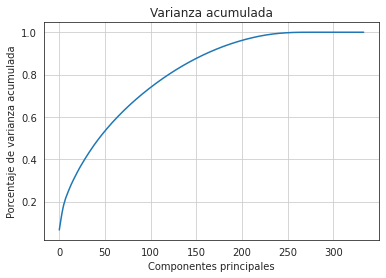

In [56]:
pca_varianza = PCA(n_components=X.shape[1]).fit(StandardScaler().fit_transform(X))
plt.plot(np.cumsum(pca_varianza.explained_variance_/np.sum(pca_varianza.explained_variance_)))
plt.title('Varianza acumulada')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza acumulada')
plt.grid()

In [57]:
experimentar_PCA(n_feats=[170, 180], X= X, Y = Y)

,NUM_COM,RMSE_VALIDACION con T,IC_RMSE_VALIDACION con T,RMSE_VALIDACION sin T,IC_RMSE_VALIDACION sin T,MAPE_VALIDACION con T,IC_MAPE_VALIDACION con T,MAPE_VALIDACION sin T,IC_MAPE_VALIDACION sin T,T_EJECUCION
0,170.0,0.152611,0.009227,31651.359584,4663.030090,0.868113,0.044607,10.620798,0.611116,385.924081
1,180.0,0.152814,0.009836,31687.834415,4602.907504,0.870497,0.050668,10.640330,0.679391,340.115734
